<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Авторы материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий и Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 0. Работа с векторами в библиотеке NumPy

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

In [1]:
# Python 2 and 3 compatibility
from __future__ import absolute_import, division, print_function, unicode_literals

# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")
import numpy as np

In [2]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такой массив может содержать:
- значения физических величин в разые моменты времени при моделировании
- значения сигнала, измеренного прибором
- интенсивности пикселов 
- 3D координаты объектов, полученных, например, при МРТ
- ...


**Зачем NumPy:** Эффективность базовых операций 


In [ ]:
L = range(1000)

In [ ]:
%timeit [i**2 for i in L]

In [ ]:
a = np.arange(1000)

In [ ]:
%timeit a**2

Интерактивная справка


In [ ]:
?np.array

поиск в документации


In [ ]:
np.lookfor("create array")

In [ ]:
np.con*?

#### Библиотеку принято импортировать так

In [3]:
import numpy as np

## Создание массивов

* **1-D**:


In [4]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [5]:
a.ndim

1

In [6]:
a.shape

(4,)

In [7]:
len(a)

4

* **2-D, 3-D, ...**:


In [9]:
b = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [10]:
b.ndim

2

In [11]:
b.shape

(2, 3)

In [12]:
len(b)  # returns the size of the first dimension

2

In [13]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [14]:
c.shape

(2, 2, 1)

## Методы для создания массивов

На практике мы редко добавляем элементы по одному


- Равномерно распределенные элементы:


In [15]:
a = np.arange(10)  # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
b = np.arange(1, 9, 2)  # start, end (exclusive), step
b

array([1, 3, 5, 7])

- по числу элементов:


In [17]:
c = np.linspace(0, 1, 6)  # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [18]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Часто встречающиеся массивы:


In [19]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [20]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [21]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [23]:
a = np.random.rand(4)  # uniform in [0, 1]
a

array([0.55391699, 0.88438431, 0.56999718, 0.50840838])

In [24]:
b = np.random.randn(4)  # Gaussian
b

array([-0.15926432, -0.23949258,  0.26623089,  1.88061235])

In [25]:
np.random.seed(1234)  # Setting the random seed

## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [26]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [27]:
b = np.array([1.0, 2.0, 3.0])
b.dtype

dtype('float64')

Можно задать тип данных явно. По умолчанию - `float64`

In [28]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [29]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

Прочие типы данных:

- Комплексные числа


In [30]:
d = np.array([1 + 2j, 3 + 4j, 5 + 6 * 1j])
d.dtype

dtype('complex128')

 - Bool


In [31]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [32]:
f = np.array(["Bonjour", "Hello", "Hallo",])
f.dtype  # <--- strings containing max. 7 letters

dtype('<U7')

## Основы визуализации

$ ipython notebook --pylab=inline

Или из тетрадки:

In [33]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Параметр `inline` говорит серверу IPython о том, что результаты будут отображаться в самой тетрадке, а не в новом окне. 


Импортируем *Matplotlib*


In [34]:
import matplotlib.pyplot as plt  # the tidy way

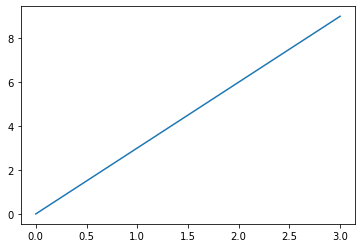

In [35]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)  # line plot
plt.show()  # <-- shows the plot (not needed with pylab)

Или с использованием *pylab*:


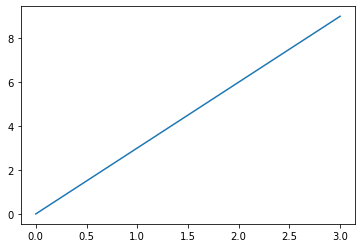

In [36]:
plot(x, y)  # line plot

Использование `import matplotlib.pyplot as plt` рекомендуется для скриптов, а `pylab` - в тетрадках IPython.

 - Отображение одномерных массивов:


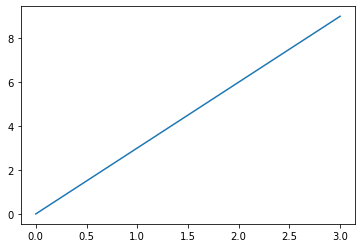

In [37]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)  # line plot

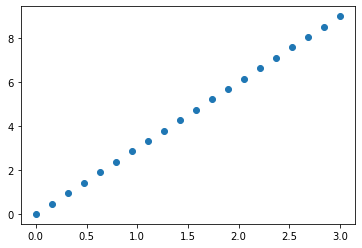

In [38]:
plt.plot(x, y, "o")  # dot plot

- Отображение двухмерных массивов (например, изображений):


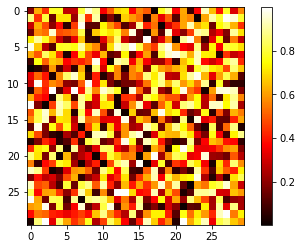

In [39]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [40]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
a[0], a[2], a[-1]

(0, 2, 9)

Работает и популярный в Python способ отражения массива:


In [42]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Для многомерных массивов индексы - это кортежи целых чисел


In [43]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [44]:
a[1, 1]

1

In [45]:
a[2, 1] = 10  # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [46]:
a[1]

array([0, 1, 0])

**Срезы**

In [47]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
a[2:9:3]  # [start:end:step]

array([2, 5, 8])

Последний индекс не включается

In [49]:
a[:4]

array([0, 1, 2, 3])

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [50]:
a[1:3]

array([1, 2])

In [51]:
a[::2]

array([0, 2, 4, 6, 8])

In [52]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можно совмещать присваивание и срез:


In [53]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [54]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## Пример. Матрица делителей

Отобразить матрицу, в которой вычеркивается **(x, y)**, если **y** делится на **x**.

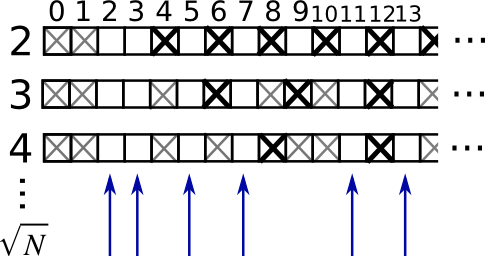

In [55]:
from IPython.display import Image

Image(filename="../../img/prime-sieve.png")

* Создадим массив `is_prime`, заполненний значениями True


In [56]:
is_prime = np.ones((100,), dtype=bool)

* Вычеркнем 0 и 1 как не являющиеся простыми:


In [57]:
is_prime[:2] = 0

* Для каждого натурального `j` начиная с  2, "вычеркнем" числа, ему кратные:


In [58]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2 * j :: j] = False

is_prime

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

## Индексирование масками

In [59]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [60]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [61]:
mask = a % 3 == 0
extract_from_a = a[mask]  # or,  a[a%3==0]
extract_from_a  # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [62]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Индексирование массивом целых чисел

In [63]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [64]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [65]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [66]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [67]:
a[idx]

array([[3, 4],
       [9, 7]])